In [1]:
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from predictions import *

In [2]:
df_sp = predictions("stratis_price.csv")
df_sp.data = df_sp.data.reindex(index=df_sp.data.index[::-1])

                Open      High       Low     Close    Volume Market Cap  \
2016-08-12  0.013826  0.013897  0.009226  0.011175    48,504          -   
2016-08-13  0.011171  0.016318  0.008483  0.014405  1,56,217  10,95,050   
2016-08-14  0.014405  0.033588  0.013431  0.023960  6,03,562  14,12,140   
2016-08-15  0.024023  0.027224  0.019404  0.024511  2,21,564  23,55,090   
2016-08-16  0.023893  0.031045  0.022763  0.028699  2,18,752  23,42,370   

                Mean  
2016-08-12  0.012031  
2016-08-13  0.012594  
2016-08-14  0.021346  
2016-08-15  0.023790  
2016-08-16  0.026600  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 558 entries, 2016-08-12 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          558 non-null float64
High          558 non-null float64
Low           558 non-null float64
Close         558 non-null float64
Volume        558 non-null object
Market Cap    558 non-null object
Mean    

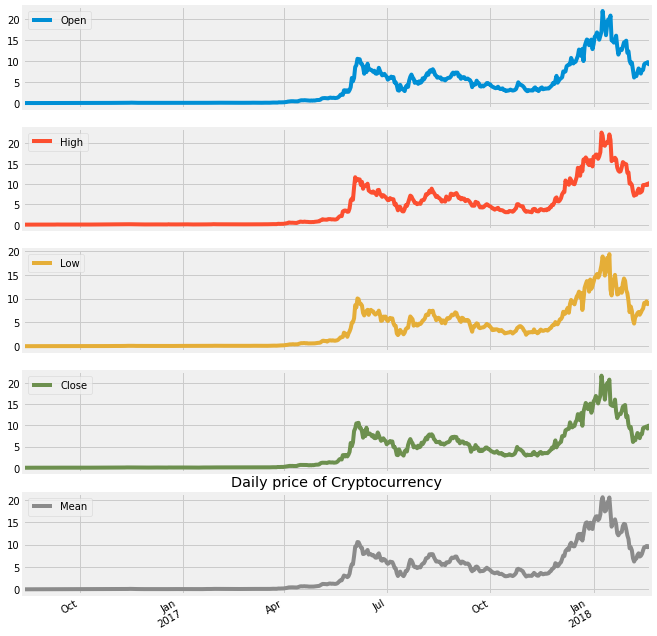

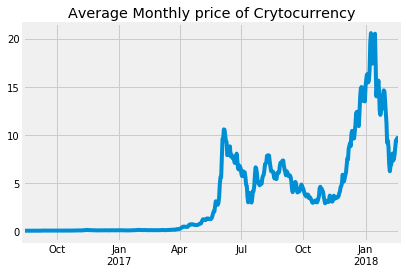

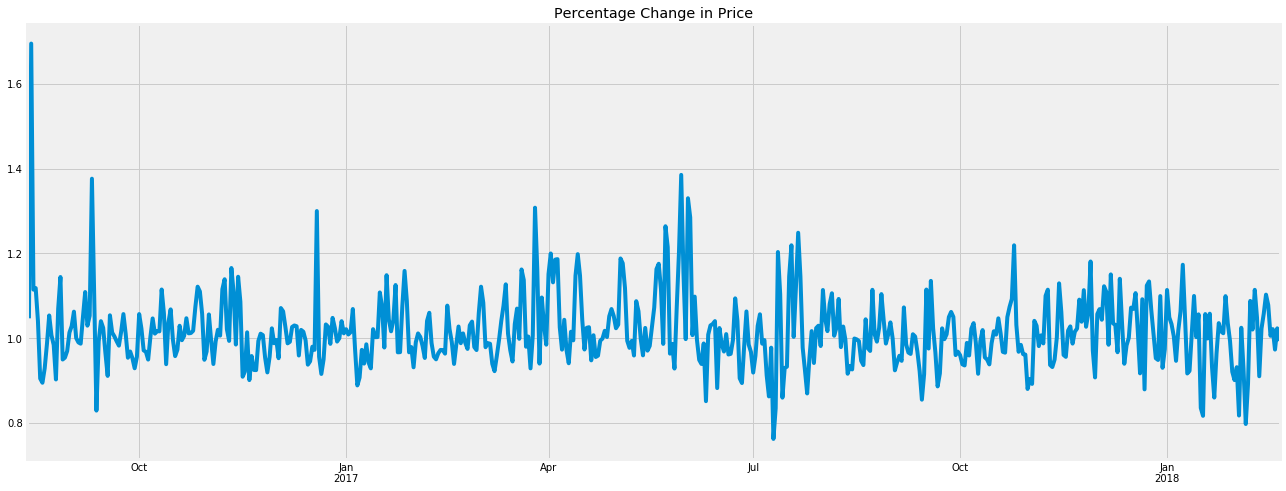

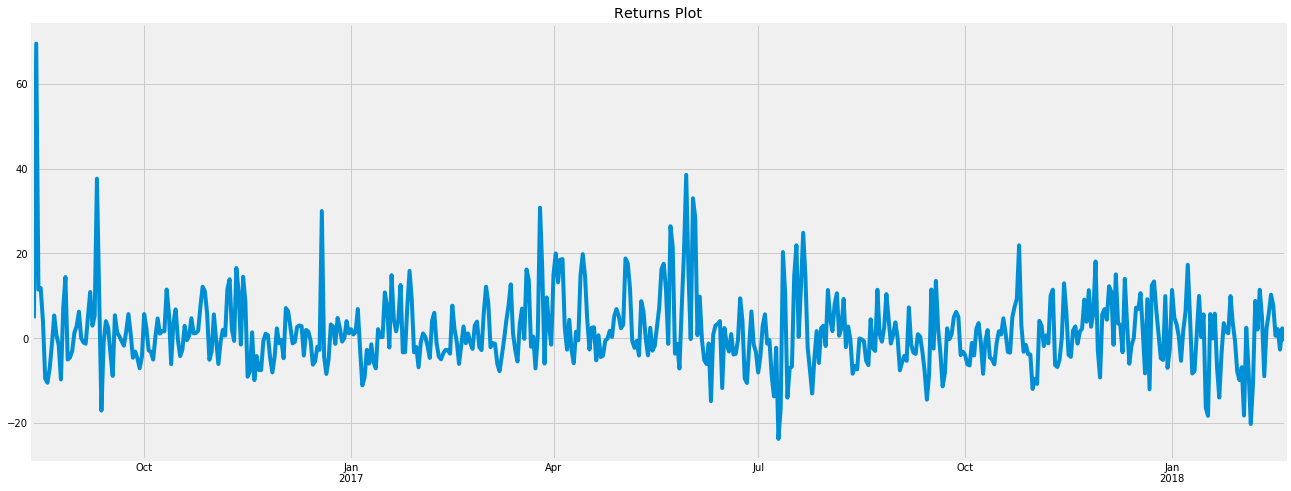

C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


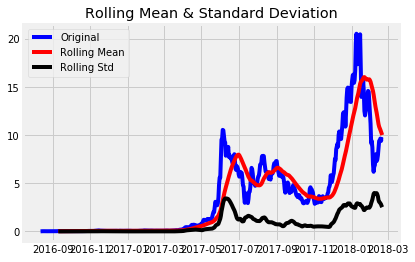

Results of Dickey-Fuller Test
Test Statistic                  -1.753853
p-value                          0.403601
#Lags Used                      14.000000
Number of Observations Used    543.000000
Critical Value(1%)              -3.442450
Critical Value(5%)              -2.866877
Critical Value(10%)             -2.569613
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            1.9261
p-value                   0.0100
Lags Used                19.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.431
P-value                         0.568
Lags                               19
-------------------------------------

Trend: Cons

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [3]:
df_sp.description()
df_sp.missing()
df_sp.plot_daily()
df_sp.plot_monthly()
df_sp.Percent_change()
df_sp.Returns()
df_sp.stationarity_test()

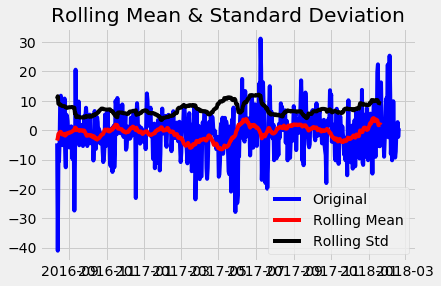

Results of Dickey-Fuller Test
Test Statistic                -8.508614e+00
p-value                        1.184099e-13
#Lags Used                     4.000000e+00
Number of Observations Used    5.520000e+02
Critical Value(1%)            -3.442252e+00
Critical Value(5%)            -2.866790e+00
Critical Value(10%)           -2.569566e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.173386
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [4]:
from Model import *
sp_ret = model(df_sp.data)
sp_ret.stationarity_test()

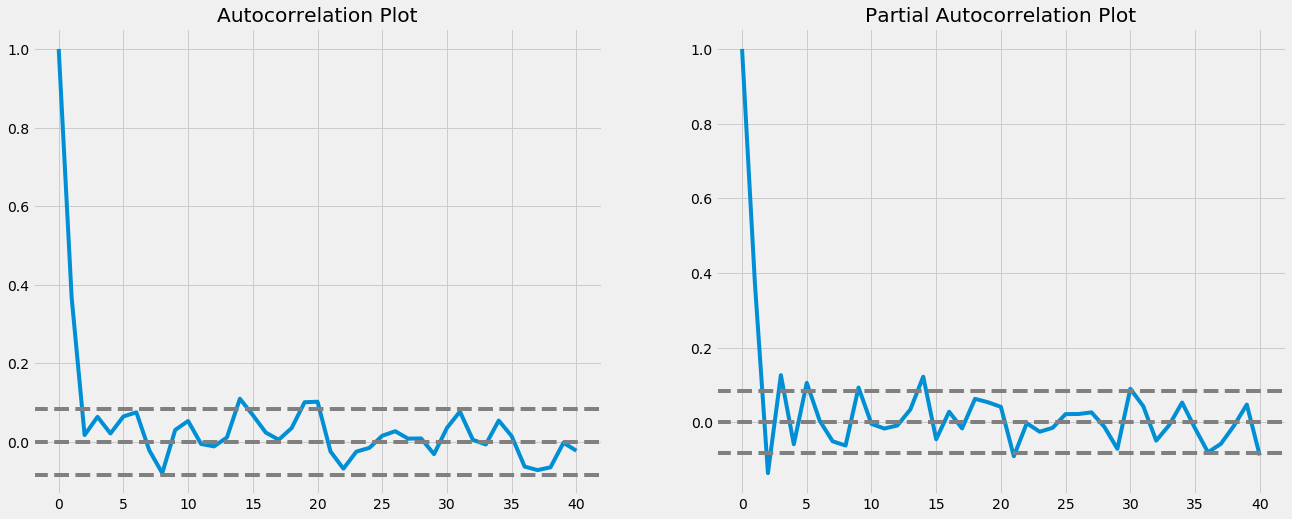

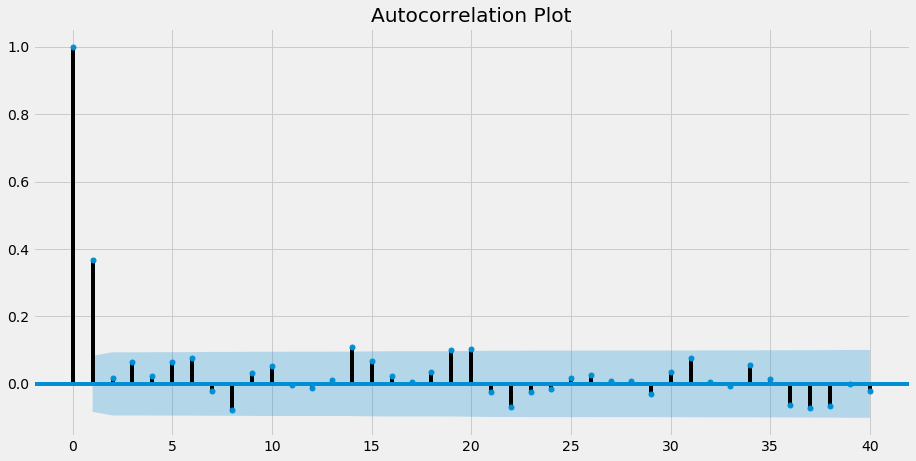

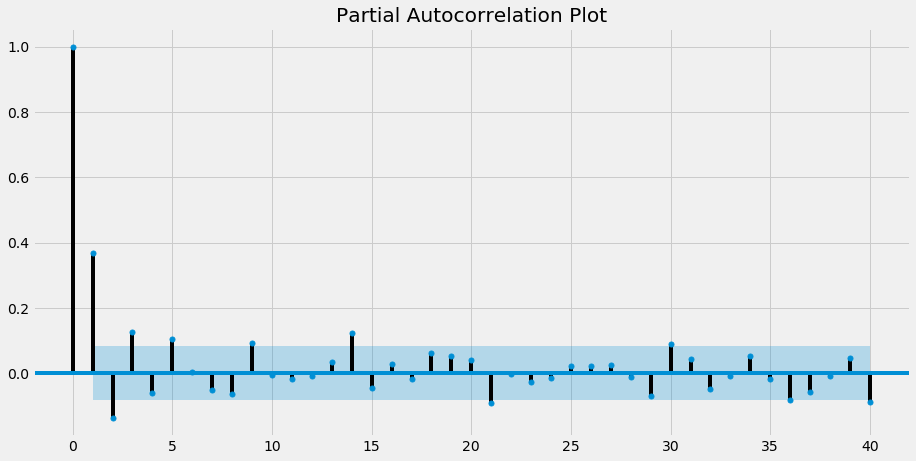

In [5]:
sp_ret.lags()
sp_ret.auto_graphics()
sp_ret.partial_graphics()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                           Results: ARMA
Model:              ARMA             BIC:                 3777.2229 
Dependent Variable: Returns          Log-Likelihood:      -1876.0   
Date:               2019-10-18 18:09 Scale:               1.0000    
No. Observations:   557              Method:              css-mle   
Df Model:           3                Sample:              02-19-2018
Df Residuals:       554                                   08-12-2016
Converged:          1.0000           S.D. of innovations: 7.020     
No. Iterations:     7.0000           HQIC:                3766.686  
AIC:                3759.9326                                       
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            -0.8658    0.4130  -2.0962  0.0365  -1.6753  -0.0563
ar.L1.Returns    -0.1609    0.0933  -1.7246  0.0852  -0.34

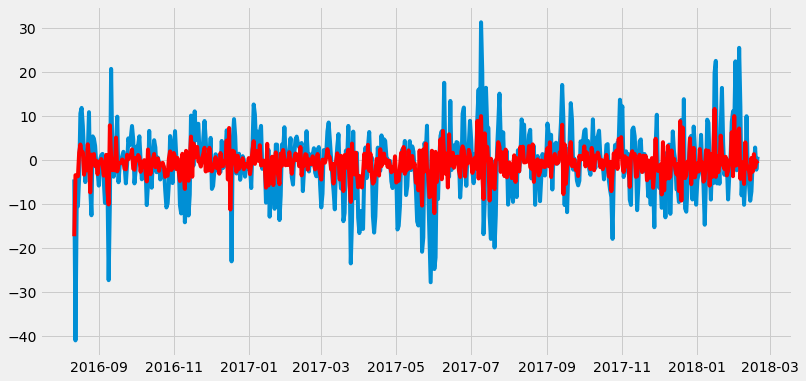

In [6]:
sp_ret.ARIMA_model(1,1)
sp_ret.plot_predict()

In [4]:
df_sp.data = df_sp.data['2017-01-01':]

In [7]:
from produce_predict import *
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
sp_sarima = produce_predict(df_sp.data)

In [8]:
sp_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:2765.0857575213167
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:2345.616992117728
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:2191.7934519140636
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:2026.3097514281167
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:2187.3235402642445
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:2118.7653901966764
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:2041.3046679652693
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:2028.8508133871692
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:2220.753657243599
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:1849.375167428658


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:1707.3326604059584
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:1573.6195064458607
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:1703.9254567834955
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:1636.6968078292402
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:1594.2641145316888
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:1578.4830170256175
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:690.2265292426044
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:669.768365131745
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:926.9428242674323
ARIMA(0, 1, 0)x(0, 1, 1, 30) - AIC:675.1558065446064
ARIMA(0, 1, 0)x(1, 0, 0, 30) - AIC:670.1201499487958
ARIMA(0, 1, 0)x(1, 0, 1, 30) - AIC:671.2423010487066


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 1, 0, 30) - AIC:712.3763739565545
ARIMA(0, 1, 0)x(1, 1, 1, 30) - AIC:676.9196075948239
ARIMA(0, 1, 1)x(0, 0, 0, 30) - AIC:648.8751133380961
ARIMA(0, 1, 1)x(0, 0, 1, 30) - AIC:632.8926566411606
ARIMA(0, 1, 1)x(0, 1, 0, 30) - AIC:866.7709908369291
ARIMA(0, 1, 1)x(0, 1, 1, 30) - AIC:637.4685853879483
ARIMA(0, 1, 1)x(1, 0, 0, 30) - AIC:634.2666050017128
ARIMA(0, 1, 1)x(1, 0, 1, 30) - AIC:634.8842928529109
ARIMA(0, 1, 1)x(1, 1, 0, 30) - AIC:673.4053762825297
ARIMA(0, 1, 1)x(1, 1, 1, 30) - AIC:639.9753132688634
ARIMA(1, 0, 0)x(0, 0, 0, 30) - AIC:692.830448412738


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 30) - AIC:674.784559912543
ARIMA(1, 0, 0)x(0, 1, 0, 30) - AIC:927.3991942144878
ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:677.1187997415755
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:672.1135797121738
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:673.9719900653533
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:712.7541337059956
ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:679.0751673795428
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:651.1778199947544


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:635.7377341433578
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:864.0684894882158
ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:638.3706161578972
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:635.9403039765682
ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:637.3072923764844
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:672.5164996520641
ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:640.9197949170439
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:657.3911993423179
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:640.7056900692005
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:884.5804234580796
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:645.1513707687934
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:640.6467765615573
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:642.621942705066
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:677.9668112038114
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:647.041616277625
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:648.9957018788134
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:633.1722600688631
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:865.7965592697002
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:638.100031942

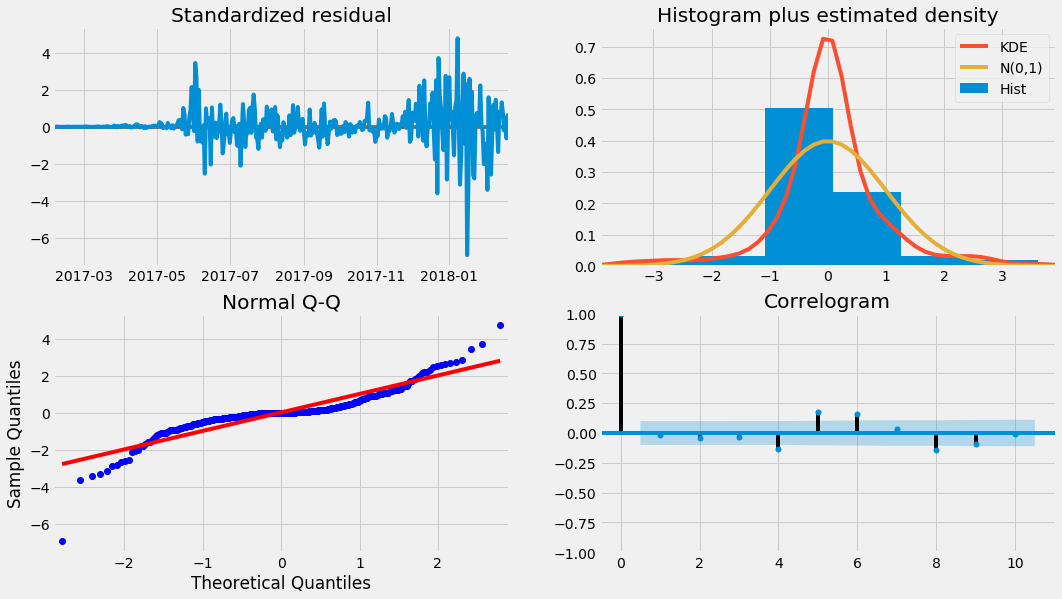

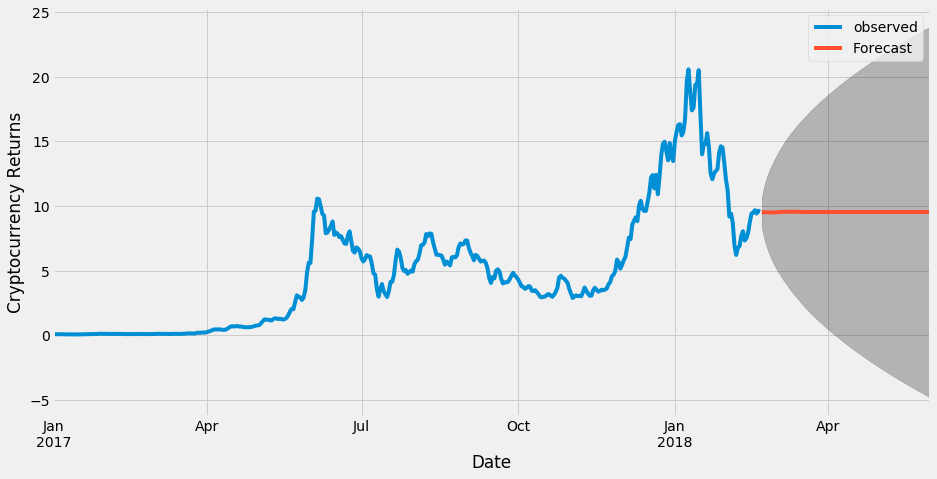

In [9]:
sp_sarima.sarima_model((0,1,1),(0,0,1,30))
sp_sarima.diagnostics()
sp_sarima.produce_forecast()

In [10]:
from fbprophet import Prophet
from prophet_model import *
sp_pro = prophet_model("stratis_price.csv",142)

<Figure size 1296x432 with 0 Axes>

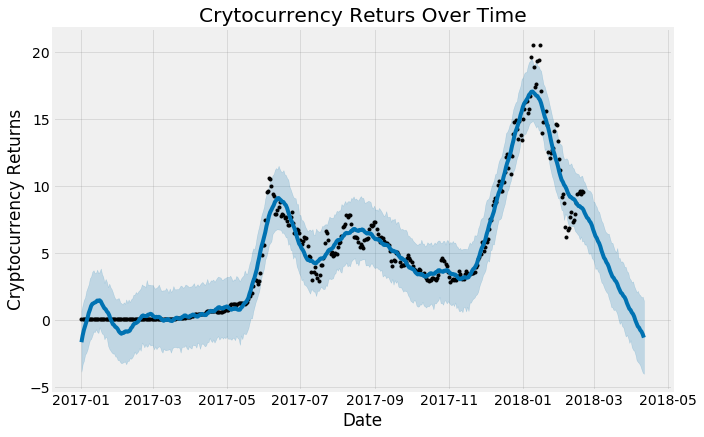

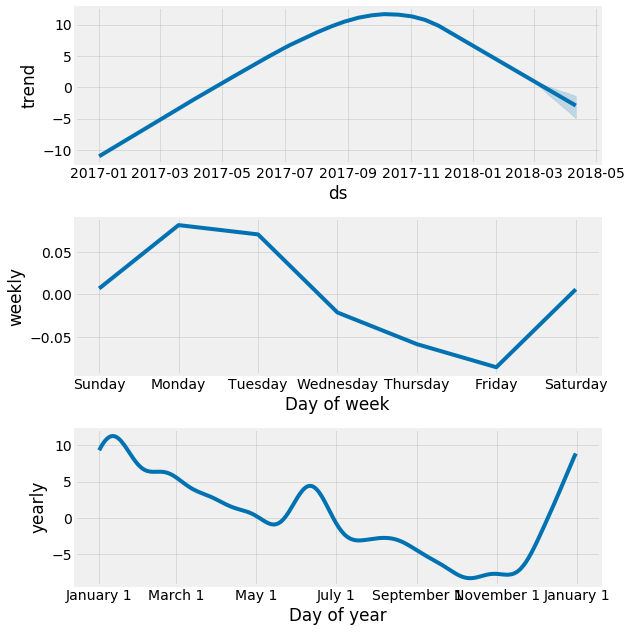

In [11]:
sp_pro.model()
sp_pro.forecast()
sp_pro.Vizualization()

In [5]:
from VaR import *
var = Var(df_sp.data)

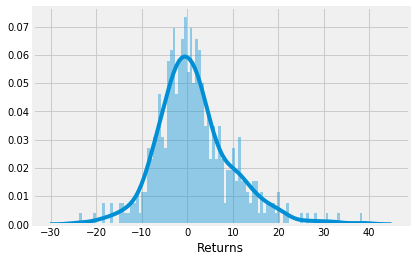

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -9.09613
95%                          -12.1038
99%                          -17.7458


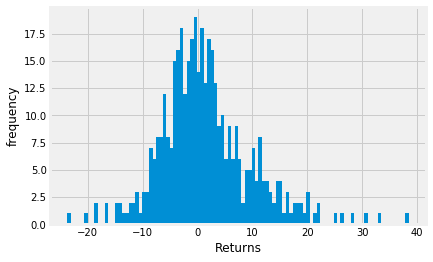

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -7.2016
95%                           -9.68388
99%                          -16.5267


In [6]:
var.var_cov(100)
var.hist_sim(100)

In [7]:
var.monte_carlo()

Simulated VAR is  12.009199822327416
